In [2]:
import pandas as pd
data = pd.read_csv('Base_Cleaned_Deleted_15thApr.csv')

C:\Users\SARANG\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18,19,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [86]:
data.columns

Index(['ID_NUMBER', 'FACULTY_STAFF_IND', 'MARITAL_STATUS', 'GENDER',
       'AGE_BRACKET', 'STATE_CODE', 'ZIP_CODE', 'STUDENT_ACTIVITY_PARTICIPANT',
       'DEGREE_CODE1', 'DEGREE_YEAR1', 'SCHOOL1', 'DEGREE_CODE2',
       'DEGREE_YEAR2', 'SCHOOL2', 'DONOR_CATEGORY', 'LIFETIME_RECOGNITION_AMT',
       'NO_YRS_GIVING', 'LAST_GIFT_AMOUNT', 'LAST_GIFT_DATE',
       'FIRST_GIFT_DATE', 'FIRST_GIFT_AMOUNT', 'GIVING_SCHOOL_UNIT1',
       'GIVING_SCHOOL_UNIT2', 'GIVING_SCHOOL_UNIT3', 'ENGAGEMENT_SCORE',
       'GIFT_AMOUNT_2018_Cleaned', 'GIFT_AMOUNT_2017_Cleaned',
       'GIFT_AMOUNT_2016_Cleaned', 'GIFT_AMOUNT_2015_Cleaned',
       'GIFT_AMOUNT_2014_Cleaned', 'GIFT_AMOUNT_2013_Cleaned',
       'GIFT_AMOUNT_2012_Cleaned', 'GIFT_AMOUNT_2011_Cleaned',
       'GIFT_AMOUNT_2010_Cleaned', 'GIFT_AMOUNT_2009_Cleaned',
       'GIFT_AMOUNT_2008_Cleaned', 'NO_EVENTS_2018_Cleaned',
       'NO_EVENTS_2017_Cleaned', 'NO_EVENTS_2016_Cleaned',
       'NO_EVENTS_2015_Cleaned', 'NO_EVENTS_2014_Cleaned',
      

In [3]:
data = data.drop(['ID_NUMBER', 'FACULTY_STAFF_IND', 'STUDENT_ACTIVITY_PARTICIPANT',
       'LIFETIME_RECOGNITION_AMT','LAST_GIFT_AMOUNT', 'LAST_GIFT_DATE',
       'FIRST_GIFT_DATE', 'FIRST_GIFT_AMOUNT','GIVING_SCHOOL_UNIT2',
        'GIVING_SCHOOL_UNIT3', 'ENGAGEMENT_SCORE','DEGREE_CODE2', 'DEGREE_YEAR2',
        'SCHOOL2','NO_EVENTS_2013_Cleaned', 'NO_EVENTS_2012_Cleaned',
       'NO_EVENTS_2011_Cleaned', 'NO_EVENTS_2010_Cleaned',
       'NO_EVENTS_2009_Cleaned', 'NO_EVENTS_2008_Cleaned', 
       'GIFT_AMOUNT_2018_Cleaned', 'GIFT_AMOUNT_2017_Cleaned',
       'GIFT_AMOUNT_2016_Cleaned', 'GIFT_AMOUNT_2015_Cleaned',
       'GIFT_AMOUNT_2014_Cleaned', 'GIFT_AMOUNT_2013_Cleaned',
       'GIFT_AMOUNT_2012_Cleaned', 'GIFT_AMOUNT_2011_Cleaned',
       'GIFT_AMOUNT_2010_Cleaned', 'GIFT_AMOUNT_2009_Cleaned',
       'GIFT_AMOUNT_2008_Cleaned','DONATED_1_0_2013', 'DONATED_1_0_2012',
       'DONATED_1_0_2011', 'DONATED_1_0_2010', 'DONATED_1_0_2009',
       'DONATED_1_0_2008'],axis=1)

In [88]:
data.columns

Index(['MARITAL_STATUS', 'GENDER', 'AGE_BRACKET', 'STATE_CODE', 'ZIP_CODE',
       'DEGREE_CODE1', 'DEGREE_YEAR1', 'SCHOOL1', 'DONOR_CATEGORY',
       'NO_YRS_GIVING', 'GIVING_SCHOOL_UNIT1', 'NO_EVENTS_2018_Cleaned',
       'NO_EVENTS_2017_Cleaned', 'NO_EVENTS_2016_Cleaned',
       'NO_EVENTS_2015_Cleaned', 'NO_EVENTS_2014_Cleaned', 'DONATED_1_0_2018',
       'DONATED_1_0_2017', 'DONATED_1_0_2016', 'DONATED_1_0_2015',
       'DONATED_1_0_2014', 'Time_Since_Last_Gift_Days'],
      dtype='object')

In [4]:
data = pd.get_dummies(data)
data.columns

Index(['AGE_BRACKET', 'DEGREE_YEAR1', 'NO_YRS_GIVING',
       'NO_EVENTS_2018_Cleaned', 'NO_EVENTS_2017_Cleaned',
       'NO_EVENTS_2016_Cleaned', 'NO_EVENTS_2015_Cleaned',
       'NO_EVENTS_2014_Cleaned', 'DONATED_1_0_2018', 'DONATED_1_0_2017',
       ...
       'GIVING_SCHOOL_UNIT1_Pharmacy and Pharmaceutical Sciences',
       'GIVING_SCHOOL_UNIT1_Philanthropy and Alumni Engagement',
       'GIVING_SCHOOL_UNIT1_President', 'GIVING_SCHOOL_UNIT1_Provost',
       'GIVING_SCHOOL_UNIT1_Public Health and Health Professions',
       'GIVING_SCHOOL_UNIT1_School of Informatics',
       'GIVING_SCHOOL_UNIT1_Social Work', 'GIVING_SCHOOL_UNIT1_Student Life',
       'GIVING_SCHOOL_UNIT1_University Support Services',
       'GIVING_SCHOOL_UNIT1_University Wide'],
      dtype='object', length=7865)

# DecisionTree Classifier

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
X = data.drop('DONATED_1_0_2018',axis=1)
y = data.DONATED_1_0_2018

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 1)

In [97]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(24641, 7864) (10561, 7864) (24641,) (10561,)


In [92]:
dt = DecisionTreeClassifier(random_state=1)

In [98]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [104]:
y_pred = dt.predict(X_test)

In [106]:
accuracy_score(y_test, y_pred)

1.0

In [123]:
from sklearn.tree import export_graphviz
export_graphviz(dt,out_file='tree.dot')

In [142]:
X.columns[[7832,7834,7830,12,2]]

Index(['DONOR_CATEGORY_Loyal       ', 'DONOR_CATEGORY_Reacquired  ',
       'DONOR_CATEGORY_1st Time    ', 'Time_Since_Last_Gift_Days',
       'NO_YRS_GIVING'],
      dtype='object')

# Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [107]:
log_reg.fit(X_train,y_train)
log_reg.score(X_train,y_train)

C:\Users\SARANG\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.998457854794854

In [108]:
log_reg.score(X_test,y_test)

0.9987690559606098

In [72]:
log_reg.coef_
log_reg.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)>

# Ensembling methods

In [114]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

In [111]:
lr = LogisticRegression(random_state=1)
dt = DecisionTreeClassifier(random_state=1)
knn = KNN()

In [113]:
classifiers = [('Logistic Regression',lr),
               ('Decision Classifier',dt),
               ('KNNeighbor Classifier',knn)]

In [118]:
for clf_name,clf in classifiers:
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print('{:s} : {:.3f}'.format(clf_name,accuracy_score(y_test,y_pred)))
    

C:\Users\SARANG\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression : 0.999
Decision Classifier : 1.000
KNNeighbor Classifier : 0.992


In [119]:
vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train,y_train)
y_pred = vc.predict(X_test)
print('Voting Classifier: {:.3f}'.format(accuracy_score(y_test,y_pred)))

C:\Users\SARANG\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Voting Classifier: 0.999


In [9]:
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


In [10]:
from keras.utils import to_categorical

In [11]:
from keras.layers.advanced_activations import LeakyReLU


In [15]:
predictors = X
n_cols = predictors.shape[1]
target = to_categorical(data.DONATED_1_0_2018)
model = Sequential([Dense(100, activation='relu', input_shape = (n_cols,)),
                    Dense(100, activation='relu'),
                    Dense(2, activation='softmax')
                   ])
                    
model.compile(optimizer='sgd', loss='binary_crossentropy',metrics=['accuracy'])
hist = model.fit(predictors, target, validation_split = 0.3, epochs=5)

Instructions for updating:
Use tf.cast instead.
Train on 24641 samples, validate on 10561 samples
Epoch 1/5
24641/24641 [==============================] - 27s 1ms/step - loss: 14.7083 - acc: 0.0825 - val_loss: 16.0302 - val_acc: 0.0000e+00
Epoch 2/5
24641/24641 [==============================] - 26s 1ms/step - loss: 14.7083 - acc: 0.0825 - val_loss: 16.0302 - val_acc: 0.0000e+00
Epoch 3/5
24641/24641 [==============================] - 26s 1ms/step - loss: 14.7083 - acc: 0.0825 - val_loss: 16.0302 - val_acc: 0.0000e+00
Epoch 4/5
24641/24641 [==============================] - 25s 1ms/step - loss: 14.7083 - acc: 0.0825 - val_loss: 16.0302 - val_acc: 0.0000e+00
Epoch 5/5
24641/24641 [==============================] - 26s 1ms/step - loss: 14.7083 - acc: 0.0825 - val_loss: 16.0302 - val_acc: 0.0000e+00


In [17]:
import matplotlib.pyplot as plt

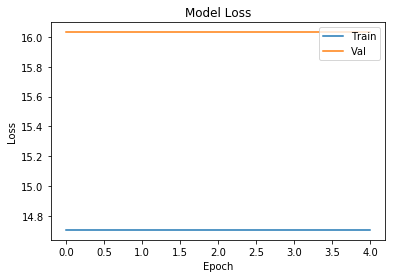

In [18]:
# Visualizing the loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Val'], loc = 'upper right')
plt.show()

In [ ]:
# Visualizing the loss
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'], loc = 'lower right')
plt.show()